## Chaotic Motion of the Duffing Oscillator

Let's examine the realistic effects of a short spring system limited in its stretching length. For example, a spring made of several windings at most would stretch to the unwound length of the spring (assuming the wire itself does not stretch). One could expect some non-linearity between the force applied to the spring and the stretch of the spring. The spring constant, instead of being constant as in a simple harmonic oscillator, could have a quadratic dependence.  That is, $k$ would be proportional to $x^2$ giving the nonlinear equation:

$$
\frac{d^2 x}{dt^2} + A x^3 =0.
$$

A realistic system will also have a frictional term proportional to the velocity. To overcome losses due to friction, and to make the system more interesting at large time values, let us have the system periodically driven. The resulting equation of motion is given below:

$$
\frac{d^2 x}{dt^2} + \alpha \frac{dx}{dt} + A x^3 = F\cos(\Omega_d t).
$$

This equation describes what is known as Duffing's oscillator, and it is known to exhibit a wide
variety of behavious. $A$, $F$, $\alpha$ and $\Omega_d$ are adjustable parameters. For this study, we set $A=1$ and $\Omega_d = 1$.

**Part (a)(2 points).** Write a program to solve the second-order differential equation written above using the fourth-order Runge–Kutta method. Plot the position $x$ versus time $t$ for 25 periods of the driving force (the period is equal to $2\pi/\Omega_d$), and plot the phase space (i.e. $dx/dt$ versus $x$). The initial values at $t=0$ are $x_0 =3$ and $dx/dt=0$. In this part parameters $(F, \alpha) = (7, 5)$. You should see the transition to a steady state harmonic motion.

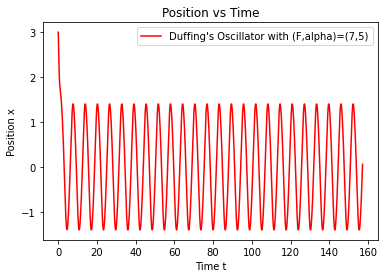

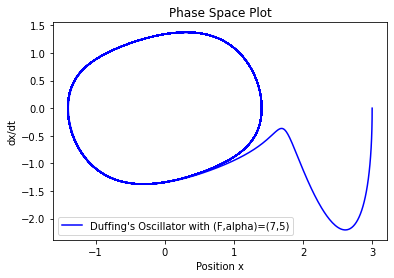

In [1]:
from numpy import arange, empty, array
from math import pi, cos
import matplotlib.pyplot as plt

A, omega = 1, 1

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''   
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Duffing_Oscillator:
    def __init__(self, F, alpha):
        self.F, self.alpha = F, alpha
        
    def f(self, t, y):
        return array([y[1], (self.F)*cos(omega*t) - (self.alpha)*y[1] - A*y[0]**3])

init_cond = [3.0, 0.0]
T = (2*pi)/omega

d = Duffing_Oscillator(7, 5)
duffing = RK4(d.f, 0.0, 25*T, 0.01, init_cond)

%matplotlib inline
# position plot
plt.plot(duffing[0], duffing[1][0], color="red",          \
         label="Duffing's Oscillator with (F,alpha)=(7,5)")
plt.title("Position vs Time")
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.legend(loc="best")
plt.show()

# phase space plot
plt.plot(duffing[1][0], duffing[1][1], color="blue",       \
         label="Duffing's Oscillator with (F,alpha)=(7,5)")
plt.title("Phase Space Plot")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="best")
plt.show()

**Part (b)(2-points).** Study the system for various choices of the following parameters $(F, \alpha) = (7,0.5), (10, 0.05)$, and $(10, 0.01)$. For each set of parameters plot the position vs time and make the phase space plot. Here as well, integrate the ODE for $25$ periods of the driving force. The initial values at $t=0$ are $x_0 =3$ and $dx/dt=0$. Are there any solutions which are clearly not a steady motion?

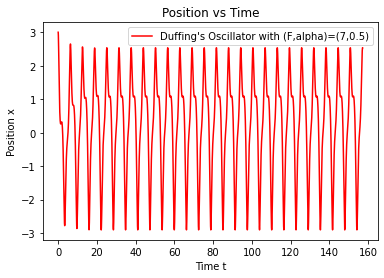

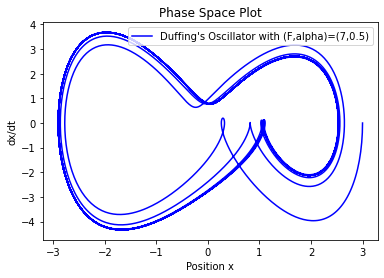

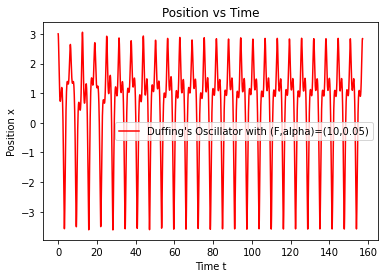

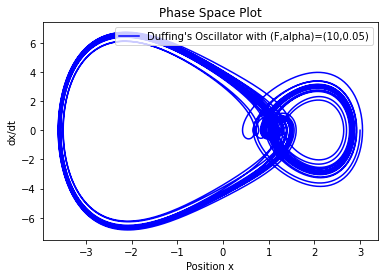

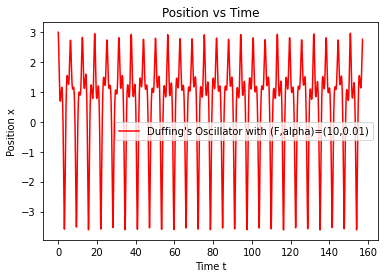

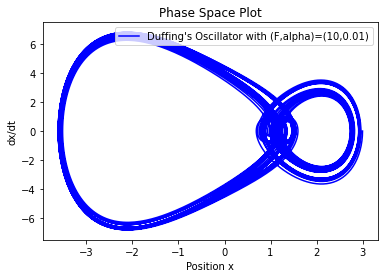

In [2]:
from numpy import arange, empty, array
from math import pi, cos
import matplotlib.pyplot as plt

A, omega = 1, 1

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Duffing_Oscillator:
    def __init__(self, F, alpha):
        self.F, self.alpha = F, alpha
        
    def f(self, t, y):
        return array([y[1], (self.F)*cos(omega*t) - (self.alpha)*y[1] - A*y[0]**3])

init_cond = [3.0, 0.0]
T = (2*pi)/omega

# for (F, alpha) = (7, 0.5)
d1 = Duffing_Oscillator(7, 0.5)
duffing1 = RK4(d1.f, 0.0, 25*T, 0.01, init_cond)

%matplotlib inline
# position plot
plt.plot(duffing1[0], duffing1[1][0], color="red",          \
         label="Duffing's Oscillator with (F,alpha)=(7,0.5)")
plt.title("Position vs Time")
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.legend(loc="best")
plt.show()

# phase space plot
plt.plot(duffing1[1][0], duffing1[1][1], color="blue",       \
         label="Duffing's Oscillator with (F,alpha)=(7,0.5)")
plt.title("Phase Space Plot")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="best")
plt.show()

# for (F, alpha) = (10, 0.05)
d2 = Duffing_Oscillator(10, 0.05)
duffing2 = RK4(d2.f, 0.0, 25*T, 0.01, init_cond)

# position plot
plt.plot(duffing2[0], duffing2[1][0], color="red",           \
         label="Duffing's Oscillator with (F,alpha)=(10,0.05)")
plt.title("Position vs Time")
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.legend(loc="best")
plt.show()

# phase space plot
plt.plot(duffing2[1][0], duffing2[1][1], color="blue",       \
         label="Duffing's Oscillator with (F,alpha)=(10,0.05)")
plt.title("Phase Space Plot")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="best")
plt.show()

# for (F, alpha) = (10, 0.01)
d3 = Duffing_Oscillator(10, 0.01)
duffing3 = RK4(d3.f, 0.0, 25*T, 0.01, init_cond)

# position plot
plt.plot(duffing3[0], duffing3[1][0], color="red",           \
         label="Duffing's Oscillator with (F,alpha)=(10,0.01)")
plt.title("Position vs Time")
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.legend(loc="best")
plt.show()

# phase space plot
plt.plot(duffing3[1][0], duffing3[1][1], color="blue",       \
         label="Duffing's Oscillator with (F,alpha)=(10,0.01)")
plt.title("Phase Space Plot")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="best")
plt.show()

We saw in part a) that for (F,alpha) = (7,5), we get a steady periodic motion. We see that all three plots in this part are also periodic motion, however, the steadiness of the motion has come into question. The motion becomes noisy as x(t) approaches the positive amplitude in the periodic motion (as seen by the sudden spikes on the graphs). For (F, alpha) = (10, 0.01), this is the most obvious.

**Part (c)(5points)**. To study this system further, let us consider the stability of the solution with respect to the initial conditions. So far all of our solutions started from the initial conditions $x_0 =3$, $dx/dt=0$ at $t=0$. 

Solve the differential equation for $(F, \alpha) = (7, 5)$ up to the final moment of time equal to $10\pi$ for two initial conditions $x_0 =3$, $dx/dt=0$, and  $x_0 =3.001$, $dx/dt=0$. Plot the logarithm of the absolute values of the difference of two solutions for times between $4\pi$ and $10\pi$ only. Your result should be a wavy line.  

Do the same for $(F, \alpha) = (10, 0.01)$. Your result should consist of the local double maxima that repeat themselves with some period but increase in amplitude, and sharp dips in between. If you look carefully at the double maxima, the value of the right maximum should be a bit higher.

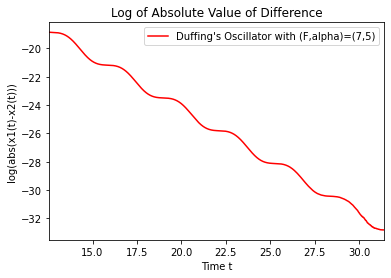

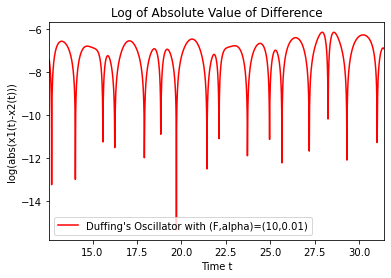

In [3]:
from numpy import arange, empty, array, zeros_like
from math import pi, cos, log
import matplotlib.pyplot as plt

A, omega = 1, 1

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Duffing_Oscillator:
    def __init__(self, F, alpha):
        self.F, self.alpha = F, alpha
        
    def f(self, t, y):
        return array([y[1], (self.F)*cos(omega*t) - (self.alpha)*y[1] - A*y[0]**3])

# for (F, alpha) = (7, 5)
d1 = Duffing_Oscillator(7, 5)

init_cond = [3.0, 0.0]
duffing1 = RK4(d1.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

init_cond = [3.001, 0.0]
duffing2 = RK4(d1.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

y = zeros_like(duffing1[1][0]) # initialize empty array, same size as RK4 result

for i in range(len(duffing1[1][0])):
    y[i] = log(abs(duffing1[1][0][i] - duffing2[1][0][i])) # fill array with values

%matplotlib inline
# note with step size pi/360, 4*pi occurs at index 360*4
plt.plot(duffing1[0][360*4:], y[360*4:], color="red",          \
         label="Duffing's Oscillator with (F,alpha)=(7,5)")
plt.title("Log of Absolute Value of Difference")
plt.xlim(4*pi, 10*pi)
plt.xlabel('Time t')
plt.ylabel('log(abs(x1(t)-x2(t)))')
plt.legend(loc="best")
plt.show()

# for (F, alpha) = (10, 0.01)
d2 = Duffing_Oscillator(10, 0.01)

init_cond = [3.0, 0.0]
duffing3 = RK4(d2.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

init_cond = [3.001, 0.0]
duffing4 = RK4(d2.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

y2 = zeros_like(duffing3[1][0]) # initialize empty array, same size as RK4 result

for i in range(len(duffing3[1][0])):
    y2[i] = log(abs(duffing3[1][0][i] - duffing4[1][0][i])) # fill array with values

# note with step size pi/360, 4*pi occurs at index 360*4
plt.plot(duffing3[0][360*4:], y2[360*4:], color="red",          \
         label="Duffing's Oscillator with (F,alpha)=(10,0.01)")
plt.title("Log of Absolute Value of Difference")
plt.xlim(4*pi, 10*pi)
plt.xlabel('Time t')
plt.ylabel('log(abs(x1(t)-x2(t)))')
plt.legend(loc="best")
plt.show()

**Part (d)(9 points).** We have two plots for $(F, \alpha) = (7, 5)$ and $(F, \alpha) = (10, 0.01)$. Times varies from $4\pi$ to $10\pi$ on both plots. Let us focus on the values and locations of the local maxima.
It is reasonable to assume that each of these maxima is located somewhere in a segment between $[(4+i)\pi, (5+i)\pi]$, where $i=0,1,2,3,4,5$. 

Breaking the total time segment from $4\pi$ to $10\pi$ into six equal parts, determine the locations of each maximum and the corresponding values at them. Do this first $(F, \alpha) = (7, 5)$. You need two have two arrays each containing six elements, one array for the locations of the maxima in time, and the other for the values. If you look at the array containing the time points you will see that the maxima are indeed equidistant for $(F, \alpha) = (7, 5)$. Plot the values of the maxima vs locations; you should get a decreasing straight line.

Since both dependences (representing the maxima of the logarithms of the absolute values of the differences as functions of time) are linear, we can write:

$$
\log(|\Delta x|_{max}) = C+\lambda t.
$$

$\lambda$ is called the Lyapunov exponent. For non-chaotic regime $\lambda <0$, while for the chaotic one $\lambda >0$. The transition to chaos occurs when $\lambda =0$. In the chaotic regime, 
the difference between the solutions for very close initial conditions exponentially grows with time at small enough $t$.

Determine the Lyapunov exponents for $(F, \alpha) = (7, 5)$ and  $(F, \alpha) = (10, 0.01)$.

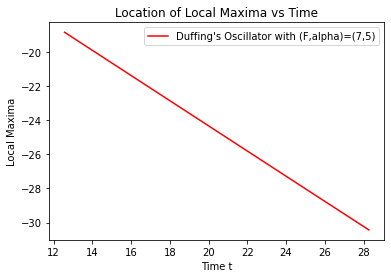

The Lyapunov exponent for (F,alpha)=(7,5) is -0.7364757415752972


In [2]:
from numpy import arange, empty, array, zeros, zeros_like
from math import pi, cos, log
import matplotlib.pyplot as plt

A, omega = 1, 1

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Duffing_Oscillator:
    def __init__(self, F, alpha):
        self.F, self.alpha = F, alpha
        
    def f(self, t, y):
        return array([y[1], (self.F)*cos(omega*t) - (self.alpha)*y[1] - A*y[0]**3])

def find_local_max_index(arr, ti, tf):
    '''
    find_local_max_index consumes an array and two integers (representing values
      of pi ie. ti = 4 represents 4*pi, tf=5 represents 5*pi), and returns the
      index of the maximum value of the array between ti*pi and tf*pi.
    
    find_local_max_index: NumPyArray Float Float -> Int
    requires: tf = ti-1, use step size pi/360 in RK4
    '''
    max_index, i = ti, ti
    while True:
        if arr[i] > arr[max_index]: # update max index
            max_index = i
        if i >= tf: break
        i += 1
        
    return max_index

# for (F, alpha) = (7, 5)
d1 = Duffing_Oscillator(7, 5)

init_cond = [3.0, 0.0]
duffing1 = RK4(d1.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

init_cond = [3.001, 0.0]
duffing2 = RK4(d1.f, 0.0, 10*pi + (pi/360), pi/360, init_cond)

y1 = zeros_like(duffing1[1][0]) # initialize empty array, same size as RK4 result

for i in range(len(duffing1[1][0])):
    y1[i] = log(abs(duffing1[1][0][i] - duffing2[1][0][i])) # fill array with values

times1, maxes1 = zeros(shape=(6,)), zeros(shape=(6,)) # empty arrays for max values

for i in range(4, 10): # loop finds max between n*pi and (n+1)*pi, n=4,5,6,7,8,9
    j = i+1
    index = find_local_max_index(y1, 360*i, 360*j)
    times1[i-4], maxes1[i-4] = duffing1[0][index], y1[index] # store for plotting
    
%matplotlib inline
plt.plot(times1, maxes1, color="red",                          \
         label="Duffing's Oscillator with (F,alpha)=(7,5)")
plt.title("Location of Local Maxima vs Time")
plt.xlabel('Time t')
plt.ylabel('Local Maxima')
plt.legend(loc="best")
plt.show()

# lyapunov exponents
lyapunov_exponent1 = (maxes1[0]-maxes1[-1])/(times1[0]-times1[-1]) #basic slope formula

print("The Lyapunov exponent for (F,alpha)=(7,5) is "           \
      "{}".format(lyapunov_exponent1))

**Part (e)(7 points).** A measurement of the divergence is attained with the use a technique known as the Poincare section. To generate a Poincare section, one asks how the phase space looks like at the same phase angle $(\Omega_d t +\varphi)$, which for our system is the time corresponding to a multiple of $2\pi$ (remember $\Omega_d = 1$) plus an arbitrary phase. In other words, Poincare sections are phase space plots with all points absent except those that correspond to a time value of $2\pi n$.

Write a new program (copy and modify the existing 'RK4' program) to create a Poincare section
for the parameters $(F,\alpha) = (10, 0.01)$ at $2\pi n$. Your program should not take into account the first $10$ points meaning that $n>=10$. The initial conditions at $t=0$, are $x_0 =3$ and $dx/dt=0$. Since the Poincare section uses only one data point per driving cycle, to receive good resolution many steps are needed. Usually, one needs one to two orders of magnitude over that required in the earlier plots. I would recommend using the number of periods equal to $1000$, so that the final time is equal to $1000\cdot2\pi$. While plotting the results, plot the points only without connecting them with lines.   

Hint: One may want to choose a time step value equivalent to one degree of the driven phase angle so that one period equals $360$ steps.

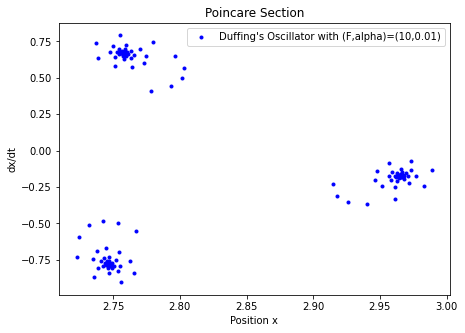

In [7]:
from numpy import arange, empty, array, shape, zeros
from math import pi, cos, log
import matplotlib.pyplot as plt

A, omega = 1, 1

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''   
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Duffing_Oscillator:
    def __init__(self, F, alpha):
        self.F, self.alpha = F, alpha
        
    def f(self, t, y):
        return array([y[1], (self.F)*cos(omega*t) - (self.alpha)*y[1] - A*y[0]**3])

# for (F, alpha) = (10, 0.01)
d = Duffing_Oscillator(10, 0.01)

init_cond = [3.0, 0.0]
duffing = RK4(d.f, 0.0, 1000*2*pi + (2*pi/360), 2*pi/360, init_cond)

x = zeros(shape=(991,)) # empty array to be filled with points at 2*pi*n
x_prime = zeros(shape=(991,)) # note there's 1000-10+1=991 points ^

# note with step size 2*pi/360, 2*pi*n occurs every 360*n

i=0 # accumulator
for n in range(360*10, 360*1000 + 1, 360): # from 10*2*pi to 1000*2*pi, inclusive
    x[i] = duffing[1][0][n]
    x_prime[i] = duffing[1][1][n]
    i+=1 # increment accumulator

    
%matplotlib inline
plt.figure(figsize=(7,5))
plt.plot(x, x_prime, marker='o', markersize=3, color='blue',     \
         linestyle="None", label="Duffing's Oscillator with (F,alpha)=(10,0.01)")
plt.title("Poincare Section")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="best")
plt.show()